<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preambule" data-toc-modified-id="Preambule-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preambule</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#gene-results" data-toc-modified-id="gene-results-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>gene results</a></span></li><li><span><a href="#merge" data-toc-modified-id="merge-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>merge</a></span></li></ul></li><li><span><a href="#GSEA:-ranks" data-toc-modified-id="GSEA:-ranks-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>GSEA: ranks</a></span></li><li><span><a href="#FGSEA-per-gene" data-toc-modified-id="FGSEA-per-gene-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>FGSEA per gene</a></span><ul class="toc-item"><li><span><a href="#Format" data-toc-modified-id="Format-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#Run-fgsea" data-toc-modified-id="Run-fgsea-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Run fgsea</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#FGSEA-per-gene,-Gini-ranking" data-toc-modified-id="FGSEA-per-gene,-Gini-ranking-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>FGSEA per gene, Gini ranking</a></span><ul class="toc-item"><li><span><a href="#Run-fgsea" data-toc-modified-id="Run-fgsea-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Run fgsea</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#FGSEA-per-function" data-toc-modified-id="FGSEA-per-function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>FGSEA per function</a></span><ul class="toc-item"><li><span><a href="#Format" data-toc-modified-id="Format-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#Plot" data-toc-modified-id="Plot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#all,-presence/absence-gene-function" data-toc-modified-id="all,-presence/absence-gene-function-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>all, presence/absence gene function</a></span></li><li><span><a href="#gini,-gene-function" data-toc-modified-id="gini,-gene-function-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>gini, gene function</a></span></li><li><span><a href="#endoR,-gene-and-general-function" data-toc-modified-id="endoR,-gene-and-general-function-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>endoR, gene and general function</a></span></li></ul></li></ul></div>

# Preambule

In [1]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(data.table)
library(stringr)
library(fgsea)
library(ggpubr)
library(viridis)
library(qs)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.4.0     

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: viridisLite

qs v0.23.4.

In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Methanogen_SCFA/Metagenomes_methanogen/envs/r-ml/lib/libopenblasp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] qs_0.23.4         viridis_0.5.1     viridisLite_0.3.0 ggpubr_0.4.0     
 [5] fgsea_1.16.0      data.table_1.13.4 forcats_0.5.0     stringr_1.4.0    
 [9] purrr_0.3.4       readr_1.4.0       tidyr_1.1.2       tibble_3.0.4     
[13] ggplot2_3.3.2     tidyverse_1.3.0  

# Load

## gene results

In [8]:
annot <- qread('HydDB_res.qs') %>% subset(hyd_ctg != 'None') %>% #select(-pred_function) %>%
            mutate_at(vars(pred_general), str_replace, pattern = '-', replacement = ' ')

In [9]:
annot %>% head(3)

hyd_ctg,n_copies,pident,Feature,Gini,endoR,pred_function,electron_donor_acceptor,O2,pred_general
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
[NiFe] Group 1f,10,72.150,s_Urmitella_timonensis,0,0,H2-uptake,Other,tolerant,H2 uptake
[NiFe] Group 1f,10,73.130,s_Varibaculum_cambriense_A,0,0,H2-uptake,Other,tolerant,H2 uptake
[FeFe] Group A1,8,66.625,s_Actinotalea_carbonis,0,0,Evolving,Ferredoxin,labile,H2 producing


In [10]:
hyd_descriptions <- read.table('hydDB_curated.txt', sep = '\t', header = TRUE)

In [11]:
hyd_descriptions %>% head(3)

,hyd_ctg,pred_function,electron_donor_acceptor,O2,comment
,<chr>,<chr>,<chr>,<chr>,<chr>
1,[Fe],Bidirectional,Hmd,tolerant,Reduction of Hmd during hydrogenotrophic methanogenesis
2,[FeFe] Group A1,Evolving,Ferredoxin,labile,
3,[FeFe] Group A2,H2-uptake,NAD,labile,


In [14]:
dsr <- qread('Fungene_dmnd_pergene.qs')

In [15]:
head(dsr, 3)

dmnd_ctg,n_copies,pident,Feature,Gini,importance,pred_general
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
dsrB,4,68.90000,s_QIAA01_sp003224905,NA,NA,SRB
dsrB,1,50.00000,s_OLB17_sp002360555,NA,NA,SRB
dsrB,3,53.33333,s_F0332_sp001652275,NA,NA,SRB


In [9]:
ace <- qread( 'Acetobase_res.qs') 

In [10]:
head(ace, 3)

,V5,n_copies,pident,Feature,Gini,endoR,Permutation,pred_general
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,fhs,10,93.85,s_OLB17_sp002360555,0,0,0,Acetogen
2,fhs,10,77.18,s_Actinomyces_gerencseriae,0,0,0,Acetogen
3,fhs,10,77.52,s_Actinomyces_graevenitzii,0,0,0,Acetogen


## merge

In [11]:
data <- annot %>% select(-electron_donor_acceptor, -O2, -pred_function) %>% rename('gene' = hyd_ctg) %>% 
            union(dsr %>% rename('gene' = dmnd_ctg) %>% select(-pred_function)) %>% 
            union(ace %>% rename('gene' = V5)) %>% subset(gene != 'None')

In [12]:
data$pred_general <- str_replace(data$pred_general, pattern = '-', replacement = ' ')

In [13]:
tmpFun <- function(x){ifelse(is.na(x), 0, x)}
data <- data %>% mutate_at(vars(Gini, endoR, Permutation, pident), tmpFun)

In [14]:
tail(data)

,gene,n_copies,pident,Feature,Gini,endoR,Permutation,pred_general
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
138205,fhs,11.0000000,64.32727,f_UBA1407,0,0,0,Acetogen
138206,fhs,0.8840165,50.60000,f_UBA1829,0,0,0,Acetogen
138207,fhs,1.0000000,52.51759,f_Victivallaceae,0,0,0,Acetogen
138208,fhs,0.0000000,0.00000,f_CAG_312,0,0,0,Acetogen
138209,fhs,0.0000000,0.00000,f_UBA1096,0,0,0,Acetogen
138210,fhs,10.0000000,90.50935,f_Akkermansiaceae,0,0,0,Acetogen


# GSEA: ranks

In [15]:
tmp <- data %>% select(Feature, endoR) %>% unique
# creating rank vector
ranks <- tmp$endoR
names(ranks) <- tmp$Feature
ranks %>% head

s_Urmitella_timonensis   s_Varibaculum_cambriense_A 
                           0                            0 
      s_Actinotalea_carbonis        s_Frankia_sp900197875 
                           0                            0 
s_Corynebacterium_amycolatum      s_Corynebacterium_durum 
                           0                            0

In [16]:
tmp <- data %>% select(Feature, Gini) %>% unique
# creating rank vector
ranks_gini <- tmp$Gini
names(ranks_gini) <- tmp$Feature
ranks_gini %>% head

s_Urmitella_timonensis   s_Varibaculum_cambriense_A 
                           0                            0 
      s_Actinotalea_carbonis        s_Frankia_sp900197875 
                           0                            0 
s_Corynebacterium_amycolatum      s_Corynebacterium_durum 
                           0                            0

# FGSEA per gene

## Format

In [18]:
# for each gene, select taxa that have >=1 gene copy
feat_class <- list()
for (hyd in unique(data$gene)){
    feat_class[[hyd]] <- data %>% subset(gene == hyd & n_copies > 0, select = Feature) %>% unlist %>% unique
}

In [19]:
length(feat_class)
lapply(feat_class, length) %>% unlist %>% summary
names(feat_class) #%>% head

[1] 34

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0    16.5    51.0   363.3   339.5  2899.0 

[1] "[NiFe] Group 1f" "[FeFe] Group A1" "[NiFe] Group 3b" "[NiFe] Group 1h"
 [5] "[NiFe] Group 2a" "[FeFe] Group B"  "[FeFe] Group A2" "[FeFe] Group A3"
 [9] "[FeFe] Group C1" "[FeFe] Group C3" "[NiFe] Group 4e" "[NiFe] Group 4a"
[13] "[NiFe] Group 1i" "[NiFe] Group 1d" "[NiFe] Group 1e" "[NiFe] Group 3d"
[17] "[NiFe] Group 1b" "[NiFe] Group 2d" "[NiFe] Group 4g" "[FeFe] Group C2"
[21] "[NiFe] Group 1a" "[NiFe] Group 4c" "[FeFe] Group A4" "[NiFe] Group 4f"
[25] "[NiFe] Group 3a" "[NiFe] Group 4d" "[NiFe] Group 4h" "[NiFe] Group 2b"
[29] "[NiFe] Group 1c" "[NiFe] Group 2c" "[NiFe] Group 3c" "dsrB"           
[33] "dsrA"            "fhs"

## Run fgsea

In [20]:
# feature enrichment analysis
set.seed(0411)
fgseaRes_class <- fgsea(pathways = feat_class, stats = ranks, minSize = 10, eps = 1e-30) 

Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-30. You can set the `eps` argument to zero for better estimation.”


In [21]:
leading_edges_class <- lapply(fgseaRes_class$leadingEdge,function(x){unlist(strsplit(x, split = ' , '))})
names(leading_edges_class) <- fgseaRes_class$pathway

In [23]:
fgseaRes_class <- fgseaRes_class %>% select(-leadingEdge) %>% 
            left_join(data %>% select(gene,pred_general) %>% unique, by = c('pathway' = 'gene')) 

In [24]:
fgseaRes_class %>% head
summary(fgseaRes_class$pval)
summary(fgseaRes_class$padj)

pathway,pval,padj,log2err,ES,NES,size,pred_general
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
[FeFe] Group A1,0.0001144982,0.0003562167,0.53843410,1.0000000,1.004965,2573,H2 producing
[FeFe] Group A2,0.2777777778,0.3158974359,0.07808923,0.9972573,1.069412,419,H2 uptake
[FeFe] Group A3,0.0613418367,0.1431309524,0.32177592,0.9982481,1.003357,1211,H2 producing
[FeFe] Group A4,0.1736111111,0.2610169492,0.13725078,0.9980085,2.243514,48,H2 producing
[FeFe] Group B,0.0196757408,0.0500837037,0.35248786,0.9984985,1.003408,1401,H2 producing
[FeFe] Group C1,0.4844444444,0.4844444444,0.05195125,0.9962234,1.106819,358,Sensory


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.1206  0.1337  0.2081  0.4844 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.2271  0.1741  0.2737  0.4844 

In [25]:
cat( c('Significant: ', sum(fgseaRes_class$padj < 0.05)) )
cat( c('\nNot significant: ', sum(fgseaRes_class$padj >= 0.05)) )

Significant:  10
Not significant:  18

In [26]:
fgseaRes_class %>% subset(padj < 0.05) %>%
    arrange(-ES)

pathway,pval,padj,log2err,ES,NES,size,pred_general
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
[FeFe] Group A1,1.144982e-04,3.562167e-04,0.5384341,1.0000000,1.004965,2573,H2 producing
fhs,4.625274e-04,1.295077e-03,0.4984931,1.0000000,1.005048,2899,Acetogen
[NiFe] Group 1d,1.000000e-30,3.500000e-30,NA,-0.2955826,-4.319088,170,H2 uptake
[NiFe] Group 2a,1.000000e-30,3.500000e-30,NA,-0.3558235,-2.224397,29,H2 uptake
[NiFe] Group 3d,1.000000e-30,3.500000e-30,NA,-0.3826107,-2.482936,31,Bidirectional
[NiFe] Group 4f,1.000000e-30,3.500000e-30,NA,-0.4330456,-1.635524,10,H2 producing
[NiFe] Group 4a,1.000000e-30,3.500000e-30,NA,-0.4343716,-8.192104,284,H2 producing
[NiFe] Group 1c,1.000000e-30,3.500000e-30,NA,-0.4850575,-6.844454,150,H2 uptake
[NiFe] Group 3c,1.000000e-30,3.500000e-30,NA,-0.5302693,-2.675128,18,H2 uptake


## plot

In [27]:
fgseaRes_class$pathway <- factor(fgseaRes_class$pathway, levels = fgseaRes_class$pathway[order(fgseaRes_class$ES)])

In [28]:
signif <- fgseaRes_class$pathway[which(fgseaRes_class$padj < 0.05)]
signif <- which(levels(fgseaRes_class$pathway) %in% signif)

In [29]:
dat_perclass <- left_join(fgseaRes_class, hyd_descriptions %>% select(-comment, -pred_function), by = c('pathway'='hyd_ctg'))
dat_perclass$O2[is.na(dat_perclass$O2)] <- 'NA'
dat_perclass$pathway <- factor(dat_perclass$pathway, levels = dat_perclass$pathway[order(dat_perclass$ES)])
dat_perclass$O2 <- factor(dat_perclass$O2, levels = c('labile', 'sensitive', 'sensitive or tolerant', 'tolerant', 'tolerant or insensitive', 'NA'))

In [30]:
dat_perclass$electron_short <- dat_perclass$electron_donor_acceptor
dat_perclass$electron_short[ dat_perclass$pred_general %in% c('SRB', 'Acetogen') ] <- 'NA'
dat_perclass$electron_short[ str_detect(dat_perclass$electron_short, pattern = 'ulfate')  ] <- 'Sulfate or others'
dat_perclass$electron_short[ dat_perclass$electron_short == 'O2 or fumarate'  ] <- 'O2'
dat_perclass$electron_short[ is.na(dat_perclass$electron_short) ] <- 'Unknown'
dat_perclass$electron_short[ str_detect(dat_perclass$electron_short, pattern = ' ferredoxin') ] <- 'Ferredoxin and other'

In [31]:
dat_perclass$electron_short %>% unique

[1] "Ferredoxin"           "NAD"                  "Ferredoxin and other"
 [4] "Formate"              "Unknown"              "Sulfate or others"   
 [7] "O2"                   "NADP"                 "Carbon monoxide"     
[10] "NA"

In [32]:
dat_perclass$electron_short <- factor(dat_perclass$electron_short
                                      , levels = c('Ferredoxin', 'NAD', 'NADP'
                                                   , 'Ferredoxin and other'
                                                   , 'Formate'
                                                   , 'Sulfate or others'
                                                   , 'O2', 'Carbon monoxide'
                                                   , 'Unknown'
                                                   , 'NA'
                                                  ))

In [33]:
o2_cols <- c(viridis(length(unique(dat_perclass$O2)))[-1], 'grey70')

In [34]:
electron_cols <- c(inferno(length(unique(dat_perclass$electron_short))-2), 'grey50', 'grey70')

In [35]:
cols <- c(magma(length(unique(dat_perclass$pred_general))), o2_cols, electron_cols)
breaks <- c('Acetogen', 'SRB', 'H2 producing', 'H2 uptake', 'Bidirectional', 'Sensory'  
            , levels(dat_perclass$O2), levels(dat_perclass$electron_short))

In [36]:
data.frame(colors = cols, ctg = breaks)

colors,ctg
<chr>,<chr>
#000004FF,Acetogen
#3B0F70FF,SRB
#8C2981FF,H2 producing
#DE4968FF,H2 uptake
#FE9F6DFF,Bidirectional
#FCFDBFFF,Sensory
#414487FF,labile
#2A788EFF,sensitive
#22A884FF,sensitive or tolerant


In [37]:
p_per_class <- ggplot(data = dat_perclass, aes(x = pathway, y = ES, fill = pred_general)) +
    geom_bar(stat='identity') +
    labs(x = 'Gene class', y= 'Effect size') +
    coord_flip()+
    annotate(geom = 'text', x = signif-0.5, y = -0.65, label = '*', size = 9)+

    geom_rect(aes(fill = dat_perclass$O2[order(dat_perclass$pathway)], ymin = 1.05, ymax = 1.15
                  , xmin = (1:nrow(dat_perclass)+0.3), xmax = (1:nrow(dat_perclass)-0.3) ))+

geom_rect(aes(fill = dat_perclass$electron_short[order(dat_perclass$pathway)], ymin = 1.2, ymax = 1.3
              , xmin = (1:nrow(dat_perclass)+0.3), xmax = (1:nrow(dat_perclass)-0.3) ))+

scale_fill_manual(values = cols, breaks = breaks, 'Gene function')+
labs(title = 'endoR importance, GSEA per gene')+
theme_bw() + 
theme(axis.text.x = element_text(size = rel(1.2))
      , axis.text.y = element_text(size = rel(1.2))
      , legend.text = element_text(size = rel(1))
      , legend.title = element_text(size = rel(1.2), vjust = 0.85)
      )

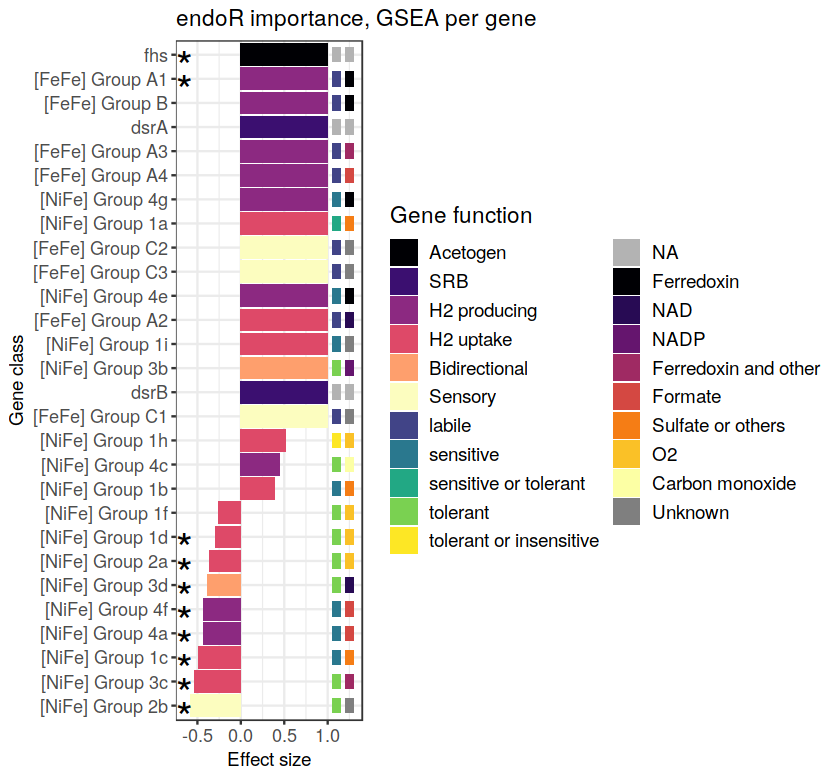

In [38]:
options(repr.plot.width=7, repr.plot.height=6.5)
p_per_class

# FGSEA per gene, Gini ranking

## Run fgsea

In [39]:
# feature enrichment analysis
set.seed(0411)
fgseaRes_class_gini <- fgsea(pathways = feat_class, stats = ranks_gini, minSize = 10, eps = 1e-30) 

Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-30. You can set the `eps` argument to zero for better estimation.”


In [40]:
leading_edges_class_gini <- lapply(fgseaRes_class_gini$leadingEdge,function(x){unlist(strsplit(x, split = ' , '))})
names(leading_edges_class_gini) <- fgseaRes_class_gini$pathway

In [41]:
fgseaRes_class_gini <- fgseaRes_class_gini %>% select(-leadingEdge) %>% 
            left_join(data %>% select(gene,pred_general) %>% unique, by = c('pathway' = 'gene')) 

In [42]:
cat( c('Significant: ', sum(fgseaRes_class_gini$padj < 0.05)) )
cat( c('\nNot significant: ', sum(fgseaRes_class_gini$padj >= 0.05)) )

Significant:  7
Not significant:  21

In [43]:
fgseaRes_class_gini %>% subset(padj < 0.05) %>%
    arrange(-ES)

pathway,pval,padj,log2err,ES,NES,size,pred_general
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
fhs,1.064402e-07,5.960649e-07,0.7049757,0.9965695,1.023007,2899,Acetogen
[FeFe] Group A1,1.614692e-09,1.130284e-08,0.7881868,0.9953083,1.021634,2573,H2 producing
[FeFe] Group B,2.461318e-10,2.297230e-09,0.8140358,0.9883634,1.014252,1401,H2 producing
[FeFe] Group A3,1.757135e-04,8.199961e-04,0.5188481,0.9824807,1.008140,1211,H2 producing
dsrB,3.089347e-03,1.235739e-02,0.4317077,0.9802956,1.005747,1020,SRB
[NiFe] Group 2a,1.000000e-30,1.400000e-29,NA,-0.3679642,-2.252101,29,H2 uptake
[NiFe] Group 3c,1.000000e-30,1.400000e-29,NA,-0.5431184,-2.696157,18,H2 uptake


In [44]:
fgseaRes_class_gini %>% subset(ES <0.982 & ES > 0.97) %>%
    arrange(-ES)

pathway,pval,padj,log2err,ES,NES,size,pred_general
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
[NiFe] Group 1a,0.476868327,0.58540925,0.05571042,0.9818272,1.0991276,48,H2 uptake
[FeFe] Group A4,0.501779359,0.58540925,0.05334779,0.9813294,1.0985702,48,H2 producing
[NiFe] Group 1b,0.498876404,0.58540925,0.05111480,0.9812781,1.0717422,59,H2 uptake
[NiFe] Group 4c,0.381493506,0.53409091,0.08243441,0.9812299,1.5062191,16,H2 producing
[NiFe] Group 1c,0.342799189,0.52116305,0.06392719,0.9803321,1.0025753,150,H2 uptake
dsrB,0.003089347,0.01235739,0.43170770,0.9802956,1.0057471,1020,SRB
[NiFe] Group 4a,0.142857143,0.26666667,0.11191832,0.9801640,1.0030809,284,H2 producing
[NiFe] Group 4f,0.335689046,0.52116305,0.09435636,0.9795314,1.7109256,10,H2 producing
[FeFe] Group C3,0.063936064,0.14918415,0.17520405,0.9789916,1.0033709,495,Sensory


## plot

In [45]:
fgseaRes_class_gini$pathway <- factor(fgseaRes_class_gini$pathway
                                      , levels = fgseaRes_class_gini$pathway[order(fgseaRes_class_gini$ES)])

In [46]:
signif_gini <- fgseaRes_class_gini$pathway[which(fgseaRes_class_gini$padj < 0.05)]
signif_gini <- which(levels(fgseaRes_class_gini$pathway) %in% signif_gini)

In [47]:
dat_perclass_gini <- left_join(fgseaRes_class_gini, hyd_descriptions %>% select(-comment, -pred_function), by = c('pathway'='hyd_ctg'))
dat_perclass_gini$O2[is.na(dat_perclass_gini$O2)] <- 'NA'
dat_perclass_gini$pathway <- factor(dat_perclass_gini$pathway, levels = dat_perclass_gini$pathway[order(dat_perclass_gini$ES)])
dat_perclass_gini$O2 <- factor(dat_perclass_gini$O2, levels = c('labile', 'sensitive', 'sensitive or tolerant', 'tolerant', 'tolerant or insensitive', 'NA'))

In [48]:
o2_cols_gini <- c(viridis(length(unique(dat_perclass_gini$O2)))[-1], 'grey70')

In [49]:
cols_gini <- c(magma(length(unique(dat_perclass_gini$pred_general))), o2_cols_gini)
breaks_gini <- c('Acetogen', 'SRB', 'H2 producing', 'H2 uptake', 'Bidirectional', 'Sensory'  
            , levels(dat_perclass_gini$O2))

In [50]:
p_per_class_gini <- ggplot(data = dat_perclass_gini
                           , aes(x = pathway, y = ES, fill = pred_general)) +
    geom_bar(stat='identity') +
    labs(x = 'Gene class', y= 'Effect size') +
    coord_flip()+
    annotate(geom = 'text', x = signif_gini-0.5, y = -0.65, label = '*', size = 9)+
    geom_rect(aes(fill = dat_perclass_gini$O2[order(dat_perclass_gini$pathway)], ymin = 1.05, ymax = 1.125
                  , xmin = (1:nrow(dat_perclass_gini)+0.3), xmax = (1:nrow(dat_perclass_gini)-0.3) ))+
scale_fill_manual(values = cols_gini, breaks = breaks_gini, 'Gene function')+
labs(title = 'Gini importance, GSEA per gene')+
theme_bw() + 
theme(axis.text.x = element_text(size = rel(1.2), angle = 20, vjust = 1, hjust = 1)
      , axis.text.y = element_text(size = rel(1.2))
      , legend.text = element_text(size = rel(1))
      , legend.title = element_text(size = rel(1.2), vjust = 0.85)
      )

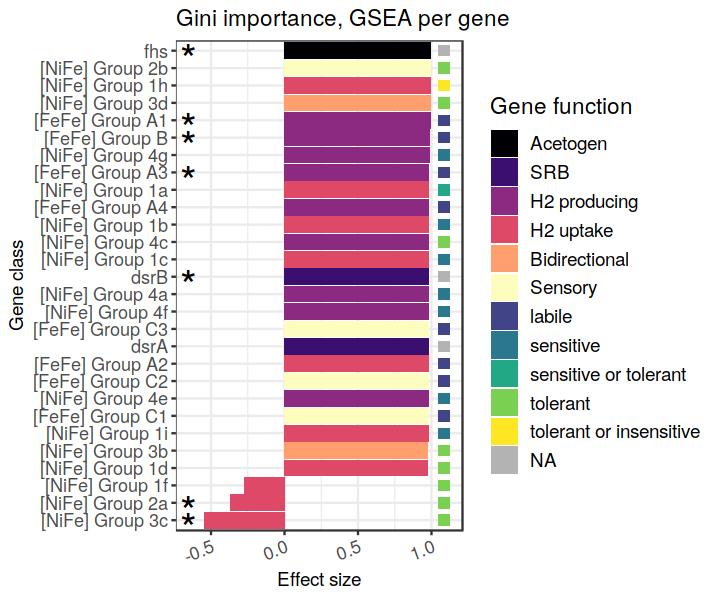

In [51]:
options(repr.plot.width=6, repr.plot.height=5)
p_per_class_gini

# FGSEA per function

## Format

In [53]:
feat_fun <- list()
for (hyd in unique(data$pred_general)){
    feat_fun[[ hyd ]] <- data %>% subset(pred_general == hyd & n_copies > 0
                                                          , select = Feature) %>% unlist %>% unique
}

In [54]:
length(feat_fun)
lapply(feat_fun, length) %>% unlist %>% summary
names(feat_fun) %>% head

[1] 6

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  102.0   753.8   945.5  1419.8  2429.5  2912.0 

[1] "H2 uptake"     "H2 producing"  "Bidirectional" "Sensory"      
[5] "SRB"           "Acetogen"

## Run

In [55]:
# feature enrichment analysis
set.seed(0411)
fgseaRes_fun <- fgsea(pathways = feat_fun, stats = ranks, minSize = 10, eps = 1e-30) 

In [56]:
leading_edges <- lapply(fgseaRes_fun$leadingEdge,function(x){unlist(strsplit(x, split = ' , '))})
names(leading_edges) <- fgseaRes_fun$pathway

In [57]:
leading_edges %>% names

[1] "Acetogen"      "Bidirectional" "H2 producing"  "H2 uptake"    
[5] "SRB"           "Sensory"

In [59]:
fgseaRes_fun <- fgseaRes_fun %>% select(-leadingEdge) %>% 
      left_join(data %>% select(gene,pred_general) %>% unique, by = c('pathway' = 'pred_general')) 

In [60]:
fgseaRes_fun %>% head
summary(fgseaRes_fun$pval)
summary(fgseaRes_fun$padj)

pathway,pval,padj,log2err,ES,NES,size,gene
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
Acetogen,0.001868427,0.01121056,0.45505987,1.000000,1.005057,2899,fhs
Bidirectional,0.319117647,0.31911765,0.08679498,0.996972,1.693028,102,[NiFe] Group 3b
Bidirectional,0.319117647,0.31911765,0.08679498,0.996972,1.693028,102,[NiFe] Group 3d
Bidirectional,0.319117647,0.31911765,0.08679498,0.996972,1.693028,102,[NiFe] Group 3a
H2 producing,0.007547702,0.02264310,0.40701792,1.000000,1.005053,2912,[FeFe] Group A1
H2 producing,0.007547702,0.02264310,0.40701792,1.000000,1.005053,2912,[FeFe] Group B


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001868 0.007548 0.108652 0.096396 0.124494 0.319118 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01121 0.02264 0.18536 0.13939 0.18536 0.31912 

In [61]:
cat( c('Significant: ', sum(fgseaRes_fun$padj < 0.05)) )
cat( c('\nNot significant: ', sum(fgseaRes_fun$padj >= 0.05)) )

Significant:  12
Not significant:  22

In [63]:
fgseaRes_fun %>% subset(padj < 0.05) %>%
    arrange(-ES) %>% select(-gene) %>% unique

pathway,pval,padj,log2err,ES,NES,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Acetogen,0.001868427,0.01121056,0.4550599,1,1.005057,2899
H2 producing,0.007547702,0.02264310,0.4070179,1,1.005053,2912


## plot

In [65]:
tmp <- fgseaRes_fun %>% 
    arrange(-ES) %>% select(-gene) %>% unique

In [66]:
tmp$pathway <- factor(tmp$pathway, levels = tmp$pathway[order(-tmp$ES)])

In [67]:
p_fun <- ggplot(data = tmp, aes(x = pathway, y = ES, fill=ifelse(tmp$padj < 0.05, TRUE, FALSE)
                                )) +
    geom_bar(stat='identity') +
    scale_fill_viridis_d('Adj. P < 0.05')+
    labs(x = 'Gene function', y= 'Effect size', title = 'ES from endoR importance') +
    theme_classic()+
    coord_cartesian(ylim = c(0.95, 1))+
    theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1))

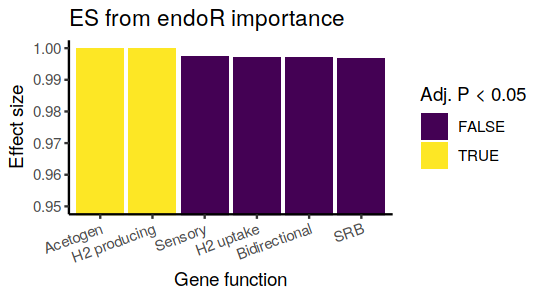

In [68]:
options(repr.plot.width=4.5, repr.plot.height=2.5)
p_fun

# Plot

## all, presence/absence gene function

In [69]:
genes_all_plot <- ggplot(data %>% subset(n_copies > 0)
              , aes(x = Feature, y = pred_general
                    , fill = ifelse(n_copies > 0, 'Present','Absent')
                   )) + 
geom_tile(color = "white") + 
theme_classic() + 
theme(axis.text.y = element_text(size = rel(1.2))
      , axis.text.x = element_blank()
      , legend.text = element_text(size = rel(1))
      , legend.title = element_text(size = rel(1.2), vjust = 0.85)
      , legend.position = 'None'
     ) + 

labs(x = "Feature", y = "Gene function"
     , title = "All features: gene presence/absence", fill = "Occurrence")+
scale_fill_manual(values = 'black')

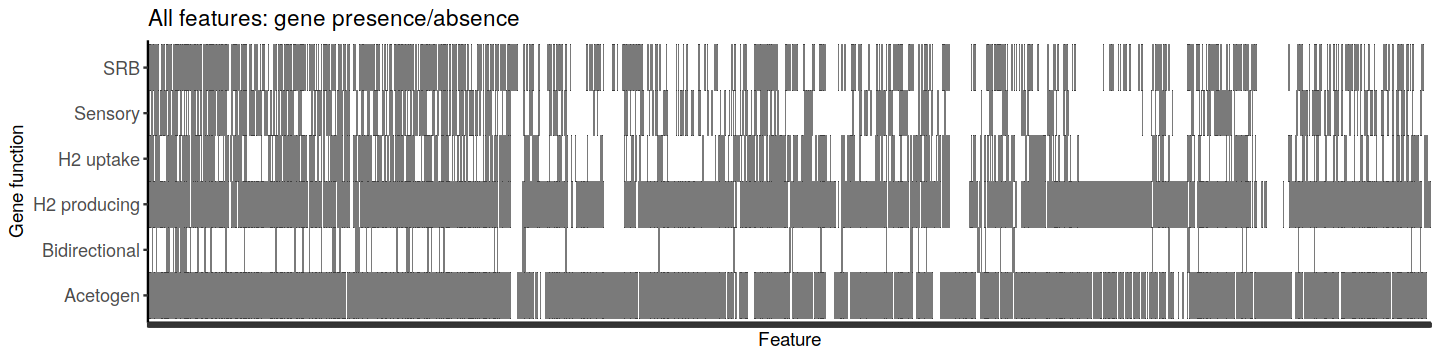

In [70]:
options(repr.plot.width=12, repr.plot.height=3)
genes_all_plot

## gini, gene function

In [71]:
l_gini <- unique(data$Feature[order(-data$Gini)])

In [72]:
genes_gini_plot <- ggplot(data %>% subset(Gini > 0 & n_copies > 0)
              , aes(x = factor(Feature, levels = l_gini), y = pred_general, fill = n_copies)) + 
geom_tile(color = "white") + 
theme_classic() + 
theme(axis.text.y = element_text(size = rel(1.2))
      , axis.text.x = element_blank()
      , legend.text = element_text(size = rel(1))
      , legend.title = element_text(size = rel(1.2), vjust = 0.85)
      #, legend.position = 'None'
     ) + 

labs(x = "Feature", y = "Gene function"
     , title = "Selected features", fill = "Copy\nnumber") + 

scale_fill_viridis_c()

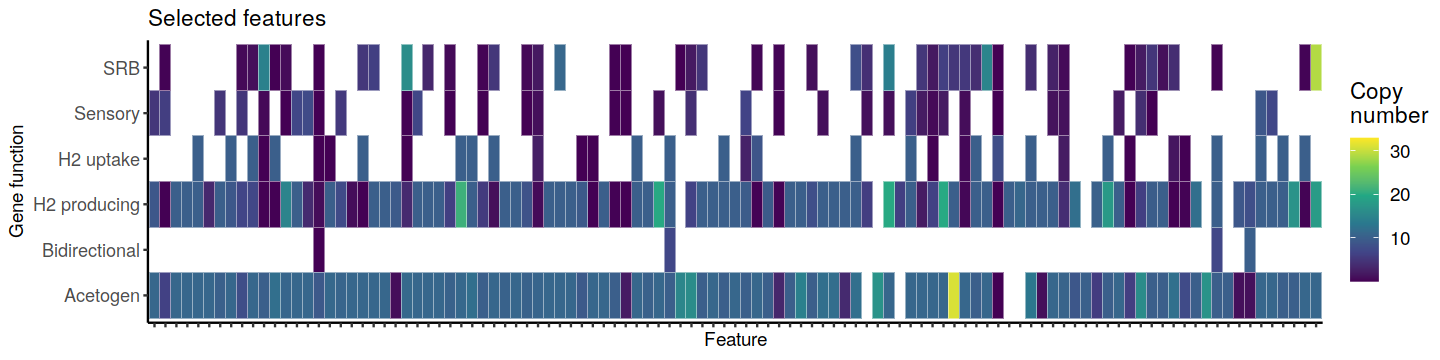

In [73]:
options(repr.plot.width=12, repr.plot.height=3)
genes_gini_plot

## endoR, gene and general function

In [79]:
tmp <- data %>% subset(endoR > 0 & n_copies > 0) %>% group_by(Feature, pred_general) %>% 
          summarise(n_copies = sum(n_copies)) %>% rename('x' = pred_general )
tmp <- rbind(tmp
             , data %>% subset(endoR > 0 & n_copies > 0) %>% select(Feature, gene, n_copies) %>% rename('x' = gene ))

`summarise()` regrouping output by 'Feature' (override with `.groups` argument)



In [80]:
tmp$x %>% unique %>% str_subset(pattern = 'FeFe')

[1] "[FeFe] Group A1" "[FeFe] Group B"  "[FeFe] Group A2" "[FeFe] Group A3"
[5] "[FeFe] Group C3" "[FeFe] Group C1" "[FeFe] Group A4" "[FeFe] Group C2"

In [81]:
tmp$x <- factor(tmp$x
   , levels = c('Acetogen', 'fhs'
                , 'SRB', 'dsrA', 'dsrB'
                , 'H2 producing', '[FeFe] Group A1', '[FeFe] Group B', '[FeFe] Group A3', '[FeFe] Group A4'
                                , '[NiFe] Group 4g', '[NiFe] Group 4e'
                , 'H2 uptake', '[NiFe] Group 1a', '[FeFe] Group A2', '[NiFe] Group 1i'
                , 'Bidirectional', '[NiFe] Group 3b'
                ,'Sensory', '[FeFe] Group C2', '[FeFe] Group C3', '[FeFe] Group C1'))

In [82]:
l_endor <- unique(data$Feature[order(data$endoR)])

In [83]:
genes_endor_plot <- ggplot(tmp
              , aes(y = factor(Feature, levels = l_endor), x = x, fill = n_copies)) + 
geom_tile(color = "white") + 
theme_classic() + 
theme(axis.text.x = element_text(size = rel(1.2), angle = 30, vjust = 1, hjust = 1)
      , axis.text.y = element_text(size = rel(1.2))
      , legend.text = element_text(size = rel(1))
      , legend.title = element_text(size = rel(1.2), vjust = 0.85)
      ) + 

geom_vline(xintercept = c(2.5, 5.5, 12.5,18.5), size = 1) +
geom_vline(xintercept = c(0.5, 2.5, 5.5, 12.5,18.5)+1, size = .5, color = 'grey80') +

labs(y = "Feature", x = "Gene function"
     , title = "endoR features", fill = "Copy\nnumber") + 

scale_fill_viridis_c()

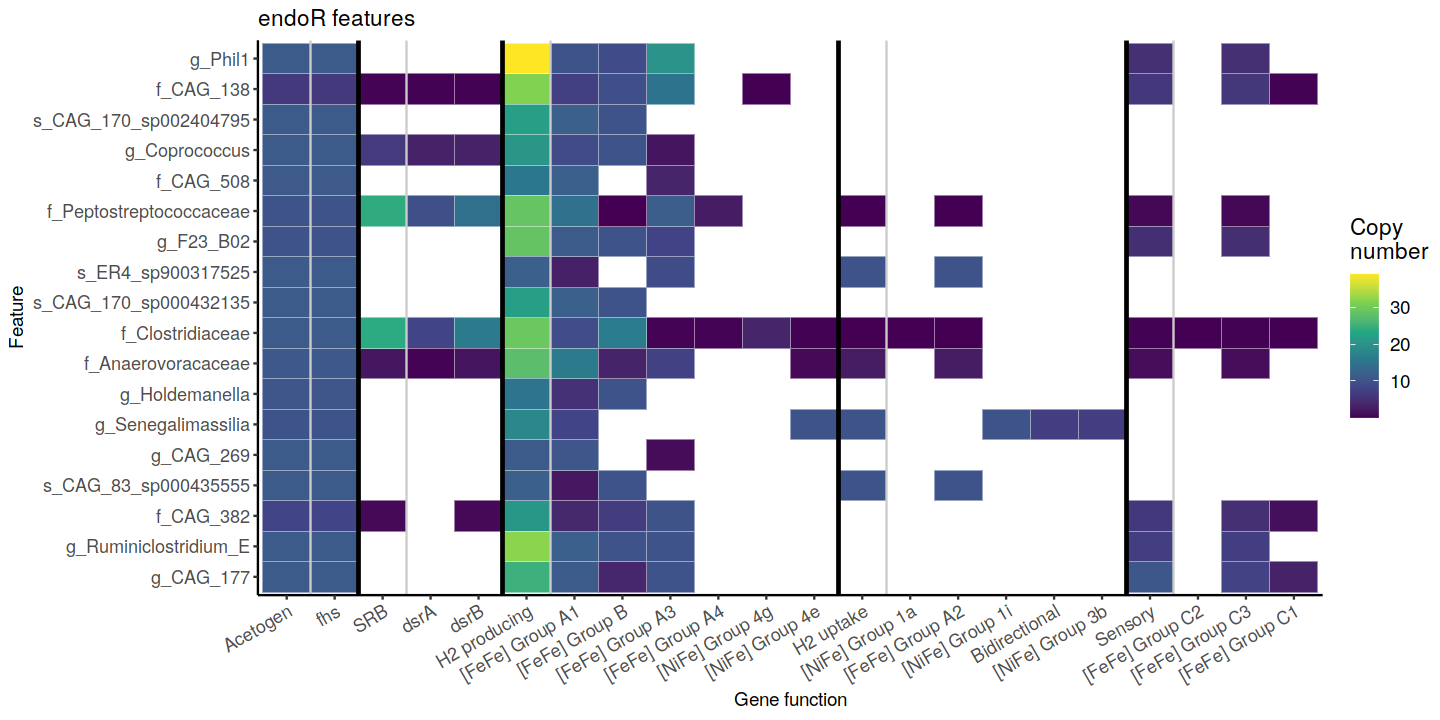

In [84]:
options(repr.plot.width=12, repr.plot.height=6)
genes_endor_plot